## Keras Neural Net Sequential Model
In order to test an algorithm capable of GPU/CPU support and deep learning models, we've begun exploring building a neural net with the Keras library. This notebook will catalog these experiements. The following code uses the 

In [1]:
%matplotlib notebook
import matplotlib
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Flatten
import numpy as np
from sklearn import preprocessing
from keras import regularizers
from keras.utils import np_utils, generic_utils

Using TensorFlow backend.


Start building the network. Currently 5 hidden layers, with 100 nodes.

In [2]:
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=90))
model.add(Dense(units=100, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model.add(Dense(units=100, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model.add(Dense(units=100, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model.add(Dense(units=100, activation='relu'))
#model.add(Flatten())
model.add(Dense(units=2011, activation='softmax'))


Model parameters: Using categorical_crossentropy and stochastic gradient descent

In [3]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

Getting the data: initial split is as follows--10,000 training exampes and 1,000 test examples

In [4]:
labels = []
examples = []
print "GETTING DATASET"
print
# Replace filename with the path to the CSV where you have the year predictions data saved.
filename = "/mnt/c/Users/Aumit/Desktop/YearPredictionMSD.txt/yp.csv"
with open(filename, 'r') as f:
    for line in f:
        content = line.split(",")
        
        labels.append(content[0])

        content.pop(0)

        # If we wanted pure lists
        #content = [float(elem) for elem in content]
        #content = map(float, content)

        # If we want a list of numpy arrays, not necessary
        #npa = np.asarray(content, dtype=np.float64)

        examples.append(content)

print "SPLITTING TRAINING AND TEST SETS"
print 
# Turning lists into numpy arrays
total_array = np.array(examples)

# Scale the features so they have 0 mean
total_scaled = preprocessing.scale(total_array)

# Numpy array of the labels 
total_labels = np.array(labels)
# 
# Split training and test:
# Increase or decrease these sizes
# Currently using first 10000 examples as training data
# Last 1000 as test data
training_examples = total_scaled[:10000]
#training_examples = random.sample(total_array, 10)
training_labels = total_labels[:10000]

# Use the following 1000 examples as text examples
test_examples = total_scaled[10000:11000]
test_labels = total_labels[10000:11000]

GETTING DATASET

SPLITTING TRAINING AND TEST SETS



/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype |S12 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In order for our labels to work with keras, we need to conver them via the to_categorical function. As of right now, we have 2011 classes (years 0 -> 2011). This means our label vectors have a lot of 0's for all the years it doesn't have.

In [6]:
y_train = keras.utils.to_categorical(training_labels, num_classes=2011)

y_test = keras.utils.to_categorical(test_labels, num_classes=2011)

Now we train our model! 

In [7]:
model.fit(training_examples, y_train, epochs=100, batch_size=32)

Epoch 1/100
10000/10000 [==============================] - 6s 563us/step - loss: 5.6850 - acc: 0.0629
Epoch 2/100
10000/10000 [==============================] - 6s 632us/step - loss: 3.5141 - acc: 0.0675
Epoch 3/100
10000/10000 [==============================] - 5s 529us/step - loss: 3.4368 - acc: 0.0733
Epoch 4/100
10000/10000 [==============================] - 5s 502us/step - loss: 3.4071 - acc: 0.0707
Epoch 5/100
10000/10000 [==============================] - 5s 508us/step - loss: 3.3789 - acc: 0.0731
Epoch 6/100
10000/10000 [==============================] - 5s 514us/step - loss: 3.3592 - acc: 0.0776
Epoch 7/100
10000/10000 [==============================] - 5s 511us/step - loss: 3.3424 - acc: 0.0775
Epoch 8/100
10000/10000 [==============================] - 5s 512us/step - loss: 3.3223 - acc: 0.0749
Epoch 9/100
10000/10000 [==============================] - 5s 513us/step - loss: 3.2979 - acc: 0.0851
Epoch 10/100
10000/10000 [==============================] - 5s 511us/step - loss: 

For the sake of time, we only did 100 epochs so training accuracy only reached 59%, but with 200 epochs (and the same number of training exmaples) we reach 99.99% training accuracy.

In [9]:
loss_and_metrics = model.evaluate(training_examples, y_train, batch_size=32)
print loss_and_metrics

10000/10000 [==============================] - 2s 168us/step
[1.1825393805980682, 0.65100000000000002]


Note: We have confirmed that the model is able to overfit (we weren't able to achieve this result with scikit-learn. Our next steps should focus on how to address overfitting, i.e, looking at regularization and adding more data.

In [3]:
training_examples = total_scaled[:30000]
#training_examples = random.sample(total_array, 10)
training_labels = total_labels[:30000]

test_examples = total_scaled[30000:31000]
test_labels = total_labels[30000:31000]

y_train = keras.utils.to_categorical(training_labels, num_classes=2011)

y_test = keras.utils.to_categorical(test_labels, num_classes=2011)

Define our new network architecture: 4 hidden units, and lambda = 0.000001 in each hidden layer.

In [5]:
model_1 = Sequential()
model_1.add(Dense(units=100, activation='relu', input_dim=90))
model_1.add(Dense(units=100, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model_1.add(Dense(units=100, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model_1.add(Dense(units=100, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model_1.add(Dense(units=100, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model_1.add(Dense(units=100, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model_1.add(Dense(units=50, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model_1.add(Dense(units=50, activation='relu'))
#model.add(Flatten())
model_1.add(Dense(units=2011, activation='softmax'))

In [6]:
model_1.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [6]:
model_1.fit(training_examples, y_train, epochs=200, batch_size=32)

Epoch 1/200
30000/30000 [==============================] - 16s 544us/step - loss: 5.2672 - acc: 0.0656
Epoch 2/200
30000/30000 [==============================] - 17s 564us/step - loss: 3.4808 - acc: 0.0680
Epoch 3/200
30000/30000 [==============================] - 12s 402us/step - loss: 3.4410 - acc: 0.0683
Epoch 4/200
30000/30000 [==============================] - 13s 422us/step - loss: 3.4181 - acc: 0.0687
Epoch 5/200
30000/30000 [==============================] - 12s 409us/step - loss: 3.3984 - acc: 0.0720
Epoch 6/200
30000/30000 [==============================] - 13s 429us/step - loss: 3.3814 - acc: 0.0722
Epoch 7/200
30000/30000 [==============================] - 13s 432us/step - loss: 3.3632 - acc: 0.0704
Epoch 8/200
30000/30000 [==============================] - 13s 424us/step - loss: 3.3343 - acc: 0.0742
Epoch 9/200
30000/30000 [==============================] - 13s 429us/step - loss: 3.2974 - acc: 0.0791
Epoch 10/200
30000/30000 [==============================] - 13s 423us/ste

30000/30000 [==============================] - 14s 478us/step - loss: 1.6084 - acc: 0.4743
Epoch 158/200
30000/30000 [==============================] - 14s 469us/step - loss: 1.6328 - acc: 0.4718
Epoch 159/200
30000/30000 [==============================] - 14s 482us/step - loss: 1.5992 - acc: 0.4803
Epoch 160/200
30000/30000 [==============================] - 14s 462us/step - loss: 1.5946 - acc: 0.4832
Epoch 161/200
30000/30000 [==============================] - 12s 399us/step - loss: 1.5819 - acc: 0.4872
Epoch 162/200
30000/30000 [==============================] - 12s 414us/step - loss: 1.5772 - acc: 0.4878
Epoch 163/200
30000/30000 [==============================] - 20s 680us/step - loss: 1.5802 - acc: 0.4905
Epoch 164/200
30000/30000 [==============================] - 14s 461us/step - loss: 1.5866 - acc: 0.4879
Epoch 165/200
30000/30000 [==============================] - 16s 527us/step - loss: 1.5587 - acc: 0.4939
Epoch 166/200
30000/30000 [==============================] - 14s 453u

In [7]:
loss_and_metrics = model_1.evaluate(training_examples, y_train, batch_size=32)
print loss_and_metrics

30000/30000 [==============================] - 5s 154us/step
[1.4454273156642914, 0.55000000000000004]


Thus, this current network architecture gives us a 55% accuracy on the test set-- a major improvement from the single digit percentages we were getting with scikit-learn. This may be a function of having more control over the structure of a kera's model as opposed to a scikit-learn model. This also a major improvement over the 7% accuracy we got on the test set with less training data, and a less complex network architecture.

In [8]:
history = model_1

In [10]:
history = model_1

Let's observe performance on via some plots. We will look at the performance of our original model first. This model has 4 hidden units, each with 100 hidden layers. It is being trained on 9000 examples, and validated against 1000 examples.

In [5]:
examples = total_scaled[:10000]
#training_examples = random.sample(total_array, 10)
labels = total_labels[:10000]
y_labels = keras.utils.to_categorical(labels, num_classes=2011)

In [6]:
history = model.fit(examples, y_labels, validation_split=0.1, epochs=100, batch_size=32)

Train on 9000 samples, validate on 1000 samples
Epoch 1/100
9000/9000 [==============================] - 5s 547us/step - loss: 6.7312 - acc: 0.0562 - val_loss: 3.7795 - val_acc: 0.0580
Epoch 2/100
9000/9000 [==============================] - 5s 523us/step - loss: 3.6272 - acc: 0.0686 - val_loss: 3.5807 - val_acc: 0.0680
Epoch 3/100
9000/9000 [==============================] - 5s 514us/step - loss: 3.4787 - acc: 0.0680 - val_loss: 3.5133 - val_acc: 0.0670
Epoch 4/100
9000/9000 [==============================] - 5s 510us/step - loss: 3.4344 - acc: 0.0727 - val_loss: 3.7640 - val_acc: 0.0670
Epoch 5/100
9000/9000 [==============================] - 5s 514us/step - loss: 3.4112 - acc: 0.0708 - val_loss: 3.4711 - val_acc: 0.0660
Epoch 6/100
9000/9000 [==============================] - 5s 523us/step - loss: 3.3858 - acc: 0.0763 - val_loss: 3.2789 - val_acc: 0.0620
Epoch 7/100
9000/9000 [==============================] - 5s 527us/step - loss: 3.3777 - acc: 0.0730 - val_loss: 3.2551 - val_acc: 

9000/9000 [==============================] - 4s 491us/step - loss: 2.1192 - acc: 0.3807 - val_loss: 4.4347 - val_acc: 0.0730
Epoch 61/100
9000/9000 [==============================] - 4s 493us/step - loss: 2.0863 - acc: 0.3829 - val_loss: 4.3573 - val_acc: 0.0710
Epoch 62/100
9000/9000 [==============================] - 4s 495us/step - loss: 2.0584 - acc: 0.3990 - val_loss: 4.3921 - val_acc: 0.0730
Epoch 63/100
9000/9000 [==============================] - 4s 492us/step - loss: 2.0350 - acc: 0.4019 - val_loss: 4.5416 - val_acc: 0.0760
Epoch 64/100
9000/9000 [==============================] - 4s 492us/step - loss: 2.0058 - acc: 0.4134 - val_loss: 4.4204 - val_acc: 0.0760
Epoch 65/100
9000/9000 [==============================] - 4s 492us/step - loss: 1.9850 - acc: 0.4149 - val_loss: 4.3576 - val_acc: 0.0800
Epoch 66/100
9000/9000 [==============================] - 4s 496us/step - loss: 1.9508 - acc: 0.4184 - val_loss: 5.1572 - val_acc: 0.0650
Epoch 67/100
9000/9000 [=======================

In [7]:
history.history.keys()

['acc', 'loss', 'val_acc', 'val_loss']

<IPython.core.display.Javascript object>


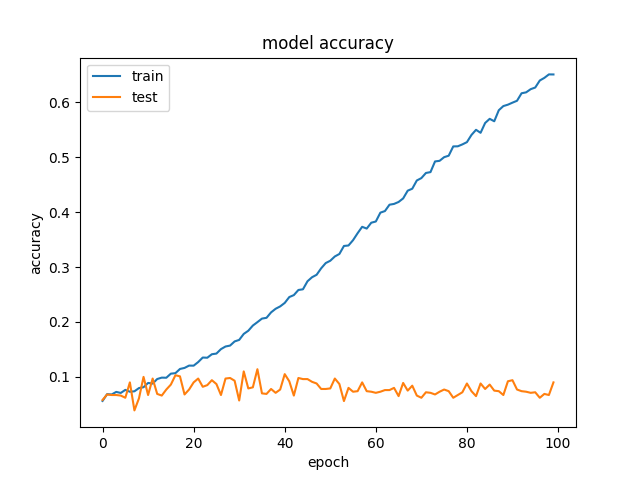

In [13]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

<IPython.core.display.Javascript object>


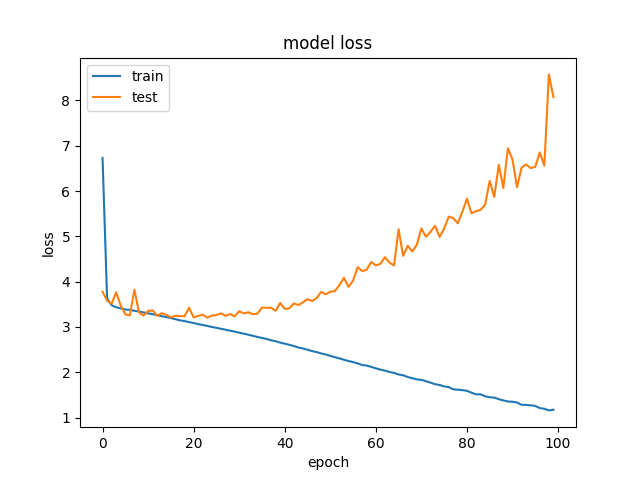

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

From the above plots, it's obvious that this model underperforms because it of high variance as well as a low amount of data. In high variance settings, it is helpful to increase the amount of training data. Let's test this idea out with 30000 training examples next.

In [18]:
# extra test set: 
examples_test = total_scaled[10000:11000]
#training_examples = random.sample(total_array, 10)
labels_test = total_labels[10000:11000]
labels_test_cat = keras.utils.to_categorical(labels_test, num_classes=2011)

In [24]:
predictions = model.predict(examples_test)

In [23]:
model.predict_classes(examples_test, verbose=1)

1000/1000 [==============================] - 0s 143us/step


array([2001, 2007, 2007, 1988, 2001, 2007, 1970, 2007, 2007, 2007, 2001,
       2007, 1992, 2007, 1980, 1994, 2001, 2007, 1966, 1993, 1972, 2007,
       2007, 2007, 2007, 2007, 2007, 2007, 1999, 2007, 2001, 2007, 2001,
       2001, 1992, 1992, 2007, 1997, 2002, 2000, 2007, 2000, 2001, 2007,
       1997, 1999, 1997, 2001, 2007, 2008, 2007, 1997, 2007, 2007, 1992,
       2007, 1997, 2007, 2004, 2003, 2007, 2004, 2007, 2008, 2008, 2007,
       2000, 2007, 2007, 2007, 1999, 2008, 2008, 2007, 1979, 2001, 2001,
       2001, 2007, 2001, 2001, 2001, 2007, 2007, 2007, 1992, 1995, 2001,
       2004, 2007, 1997, 2001, 2001, 2001, 1999, 2001, 2001, 2001, 2008,
       1992, 2001, 2005, 2001, 2001, 2007, 2001, 2007, 2007, 1997, 2007,
       2007, 2008, 2007, 1999, 2001, 2008, 2008, 2007, 2005, 2007, 2008,
       2008, 1999, 1999, 2001, 2007, 2007, 1997, 2001, 2001, 2001, 1999,
       2001, 2007, 2008, 2001, 2001, 2001, 1999, 2001, 2007, 2007, 2008,
       2007, 2004, 2007, 2000, 1979, 2000, 1999, 20

Let's confirm our suspicion and create a plot after training with approximately 30000 examples.

In [7]:
examples = total_scaled[:40000]
#training_examples = random.sample(total_array, 10)
labels = total_labels[:40000]
y_labels = keras.utils.to_categorical(labels, num_classes=2011)

In [8]:
history_more_data = model_1.fit(examples, y_labels, validation_split=0.1, epochs=250, batch_size=32)

Train on 36000 samples, validate on 4000 samples
Epoch 1/250
36000/36000 [==============================] - 18s 493us/step - loss: 4.7375 - acc: 0.0654 - val_loss: 3.4492 - val_acc: 0.0560
Epoch 2/250
36000/36000 [==============================] - 17s 465us/step - loss: 3.4561 - acc: 0.0703 - val_loss: 3.3703 - val_acc: 0.0805
Epoch 3/250
36000/36000 [==============================] - 15s 404us/step - loss: 3.4192 - acc: 0.0684 - val_loss: 3.3189 - val_acc: 0.0643
Epoch 4/250
36000/36000 [==============================] - 16s 450us/step - loss: 3.3941 - acc: 0.0725 - val_loss: 3.3287 - val_acc: 0.0783
Epoch 5/250
36000/36000 [==============================] - 17s 486us/step - loss: 3.3725 - acc: 0.0708 - val_loss: 3.2909 - val_acc: 0.0668
Epoch 6/250
36000/36000 [==============================] - 17s 475us/step - loss: 3.3482 - acc: 0.0721 - val_loss: 3.3211 - val_acc: 0.0648
Epoch 7/250
36000/36000 [==============================] - 17s 474us/step - loss: 3.3047 - acc: 0.0719 - val_lo

36000/36000 [==============================] - 23s 626us/step - loss: 2.6500 - acc: 0.1774 - val_loss: 3.6081 - val_acc: 0.0668
Epoch 59/250
36000/36000 [==============================] - 23s 632us/step - loss: 2.6436 - acc: 0.1797 - val_loss: 3.6270 - val_acc: 0.0730
Epoch 60/250
36000/36000 [==============================] - 22s 600us/step - loss: 2.6315 - acc: 0.1827 - val_loss: 3.6144 - val_acc: 0.0815
Epoch 61/250
36000/36000 [==============================] - 23s 639us/step - loss: 2.6190 - acc: 0.1835 - val_loss: 3.7129 - val_acc: 0.0707
Epoch 62/250
36000/36000 [==============================] - 22s 610us/step - loss: 2.6062 - acc: 0.1893 - val_loss: 3.6736 - val_acc: 0.0700
Epoch 63/250
36000/36000 [==============================] - 23s 632us/step - loss: 2.5962 - acc: 0.1918 - val_loss: 3.7016 - val_acc: 0.0693
Epoch 64/250
36000/36000 [==============================] - 24s 668us/step - loss: 2.5870 - acc: 0.1947 - val_loss: 3.7068 - val_acc: 0.0740
Epoch 65/250
36000/36000 [

36000/36000 [==============================] - 21s 581us/step - loss: 2.0504 - acc: 0.3481 - val_loss: 4.6652 - val_acc: 0.0673
Epoch 117/250
36000/36000 [==============================] - 19s 529us/step - loss: 2.0339 - acc: 0.3543 - val_loss: 4.7480 - val_acc: 0.0658
Epoch 118/250
36000/36000 [==============================] - 15s 426us/step - loss: 2.0157 - acc: 0.3569 - val_loss: 4.7998 - val_acc: 0.0717
Epoch 119/250
36000/36000 [==============================] - 20s 553us/step - loss: 2.0163 - acc: 0.3585 - val_loss: 4.8893 - val_acc: 0.0670
Epoch 120/250
36000/36000 [==============================] - 25s 691us/step - loss: 2.0012 - acc: 0.3598 - val_loss: 4.8671 - val_acc: 0.0665
Epoch 121/250
36000/36000 [==============================] - 23s 636us/step - loss: 1.9990 - acc: 0.3651 - val_loss: 4.8570 - val_acc: 0.0605
Epoch 122/250
36000/36000 [==============================] - 22s 607us/step - loss: 1.9831 - acc: 0.3692 - val_loss: 4.9101 - val_acc: 0.0685
Epoch 123/250
36000/

36000/36000 [==============================] - 24s 659us/step - loss: 1.6181 - acc: 0.4856 - val_loss: 5.8729 - val_acc: 0.0665
Epoch 174/250
36000/36000 [==============================] - 23s 647us/step - loss: 1.5955 - acc: 0.4923 - val_loss: 5.8399 - val_acc: 0.0698
Epoch 175/250
36000/36000 [==============================] - 16s 453us/step - loss: 1.5964 - acc: 0.4894 - val_loss: 5.9360 - val_acc: 0.0600
Epoch 176/250
36000/36000 [==============================] - 15s 428us/step - loss: 1.5928 - acc: 0.4947 - val_loss: 6.1265 - val_acc: 0.0578
Epoch 177/250
36000/36000 [==============================] - 15s 425us/step - loss: 1.5797 - acc: 0.4967 - val_loss: 6.0178 - val_acc: 0.0693
Epoch 178/250
36000/36000 [==============================] - 15s 425us/step - loss: 1.5913 - acc: 0.4937 - val_loss: 5.7998 - val_acc: 0.0668
Epoch 179/250
36000/36000 [==============================] - 22s 601us/step - loss: 1.5834 - acc: 0.4959 - val_loss: 5.8210 - val_acc: 0.0645
Epoch 180/250
36000/

Epoch 231/250
36000/36000 [==============================] - 16s 444us/step - loss: 1.3779 - acc: 0.5661 - val_loss: 6.5386 - val_acc: 0.0695
Epoch 232/250
36000/36000 [==============================] - 17s 459us/step - loss: 1.3698 - acc: 0.5633 - val_loss: 6.6753 - val_acc: 0.0617
Epoch 233/250
36000/36000 [==============================] - 16s 451us/step - loss: 1.3795 - acc: 0.5600 - val_loss: 6.6766 - val_acc: 0.0668
Epoch 234/250
36000/36000 [==============================] - 16s 446us/step - loss: 1.3493 - acc: 0.5712 - val_loss: 6.6549 - val_acc: 0.0680
Epoch 235/250
36000/36000 [==============================] - 16s 448us/step - loss: 1.3374 - acc: 0.5724 - val_loss: 6.7534 - val_acc: 0.0680
Epoch 236/250
36000/36000 [==============================] - 16s 454us/step - loss: 1.3666 - acc: 0.5655 - val_loss: 6.9209 - val_acc: 0.0665
Epoch 237/250
36000/36000 [==============================] - 16s 451us/step - loss: 1.3384 - acc: 0.5757 - val_loss: 6.8377 - val_acc: 0.0717
Epoch 

In [9]:
examples_test = total_scaled[40000:41000]
#training_examples = random.sample(total_array, 10)
labels_test = total_labels[40000:41000]
y_labels_test = keras.utils.to_categorical(labels_test, num_classes=2011)

In [13]:
model_1.evaluate(examples_test, y_labels_test, batch_size=32)

1000/1000 [==============================] - 0s 190us/step


[6.9392433128356936, 0.059999999999999998]

<IPython.core.display.Javascript object>


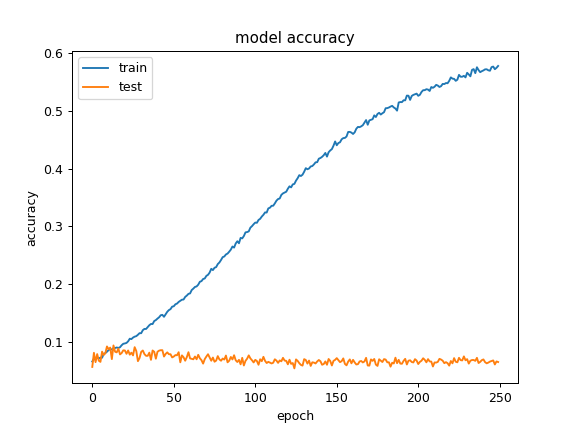

In [17]:
# summarize history for accuracy
plt.plot(history_more_data.history['acc'])
plt.plot(history_more_data.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

That's not good...

<IPython.core.display.Javascript object>


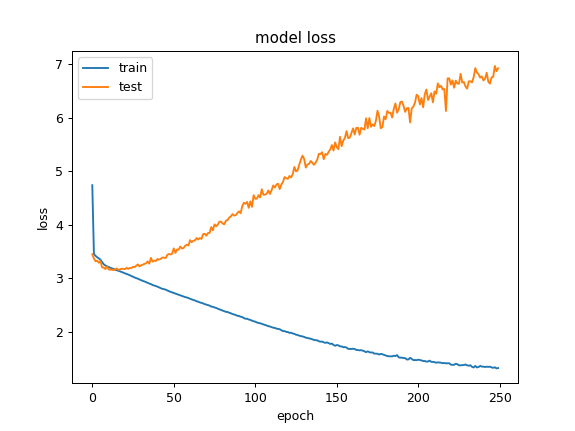

In [18]:
plt.plot(history_more_data.history['loss'])
plt.plot(history_more_data.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Test loss is increasing but training loss is decreasig.Classic case of high variance. We need to tune our hyperparameters and add more training data.

Let's observe the model with 10,000 training examples, and 200 epochs.

In [19]:
examples_small = total_scaled[:11000]
#training_examples = random.sample(total_array, 10)
labels_small = total_labels[:11000]
y_labels_small = keras.utils.to_categorical(labels_small, num_classes=2011)

In [20]:
model_small = Sequential()
model_small.add(Dense(units=100, activation='relu', input_dim=90))
model_small.add(Dense(units=100, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model_small.add(Dense(units=100, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model_small.add(Dense(units=100, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model_small.add(Dense(units=100, activation='relu'))
#model.add(Flatten())
model_small.add(Dense(units=2011, activation='softmax'))


In [21]:
model_small.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [22]:
history_small = model_small.fit(examples_small, y_labels_small, validation_split=0.1, epochs=200, batch_size=32)

Train on 9900 samples, validate on 1100 samples
Epoch 1/200
9900/9900 [==============================] - 6s 566us/step - loss: 5.6339 - acc: 0.0659 - val_loss: 3.7790 - val_acc: 0.0645
Epoch 2/200
9900/9900 [==============================] - 5s 521us/step - loss: 3.5165 - acc: 0.0694 - val_loss: 3.6994 - val_acc: 0.0245
Epoch 3/200
9900/9900 [==============================] - 5s 531us/step - loss: 3.4307 - acc: 0.0767 - val_loss: 3.5824 - val_acc: 0.0727
Epoch 4/200
9900/9900 [==============================] - 5s 532us/step - loss: 3.3998 - acc: 0.0702 - val_loss: 3.5948 - val_acc: 0.0682
Epoch 5/200
9900/9900 [==============================] - 5s 535us/step - loss: 3.3745 - acc: 0.0716 - val_loss: 3.5354 - val_acc: 0.0682
Epoch 6/200
9900/9900 [==============================] - 5s 528us/step - loss: 3.3520 - acc: 0.0816 - val_loss: 3.5193 - val_acc: 0.0709
Epoch 7/200
9900/9900 [==============================] - 6s 569us/step - loss: 3.3334 - acc: 0.0785 - val_loss: 3.6918 - val_acc: 

9900/9900 [==============================] - 5s 500us/step - loss: 2.2480 - acc: 0.3257 - val_loss: 4.3202 - val_acc: 0.0591
Epoch 61/200
9900/9900 [==============================] - 5s 490us/step - loss: 2.2189 - acc: 0.3358 - val_loss: 4.3521 - val_acc: 0.0845
Epoch 62/200
9900/9900 [==============================] - 5s 471us/step - loss: 2.1905 - acc: 0.3478 - val_loss: 4.3399 - val_acc: 0.0909
Epoch 63/200
9900/9900 [==============================] - 4s 443us/step - loss: 2.1678 - acc: 0.3472 - val_loss: 4.5889 - val_acc: 0.0655
Epoch 64/200
9900/9900 [==============================] - 4s 442us/step - loss: 2.1466 - acc: 0.3511 - val_loss: 4.4197 - val_acc: 0.0736
Epoch 65/200
9900/9900 [==============================] - 5s 500us/step - loss: 2.1225 - acc: 0.3625 - val_loss: 4.5827 - val_acc: 0.0900
Epoch 66/200
9900/9900 [==============================] - 6s 626us/step - loss: 2.0906 - acc: 0.3685 - val_loss: 4.3822 - val_acc: 0.0845
Epoch 67/200
9900/9900 [=======================

9900/9900 [==============================] - 4s 446us/step - loss: 0.9696 - acc: 0.7021 - val_loss: 7.6778 - val_acc: 0.0736
Epoch 120/200
9900/9900 [==============================] - 5s 458us/step - loss: 0.9683 - acc: 0.7039 - val_loss: 7.5608 - val_acc: 0.0664
Epoch 121/200
9900/9900 [==============================] - 4s 442us/step - loss: 0.9028 - acc: 0.7213 - val_loss: 7.6702 - val_acc: 0.0764
Epoch 122/200
9900/9900 [==============================] - 4s 444us/step - loss: 0.9519 - acc: 0.7066 - val_loss: 7.6106 - val_acc: 0.0582
Epoch 123/200
9900/9900 [==============================] - 4s 442us/step - loss: 0.8797 - acc: 0.7325 - val_loss: 7.7294 - val_acc: 0.0736
Epoch 124/200
9900/9900 [==============================] - 4s 442us/step - loss: 0.8662 - acc: 0.7326 - val_loss: 7.5372 - val_acc: 0.0909
Epoch 125/200
9900/9900 [==============================] - 4s 444us/step - loss: 0.9059 - acc: 0.7169 - val_loss: 7.7581 - val_acc: 0.0773
Epoch 126/200
9900/9900 [================

Epoch 178/200
9900/9900 [==============================] - 4s 454us/step - loss: 0.3473 - acc: 0.8987 - val_loss: 11.1749 - val_acc: 0.0691
Epoch 179/200
9900/9900 [==============================] - 4s 441us/step - loss: 0.4361 - acc: 0.8746 - val_loss: 10.7349 - val_acc: 0.0645
Epoch 180/200
9900/9900 [==============================] - 4s 441us/step - loss: 0.5301 - acc: 0.8368 - val_loss: 10.5691 - val_acc: 0.0800
Epoch 181/200
9900/9900 [==============================] - 4s 441us/step - loss: 0.4245 - acc: 0.8683 - val_loss: 10.5942 - val_acc: 0.0664
Epoch 182/200
9900/9900 [==============================] - 4s 440us/step - loss: 0.2948 - acc: 0.9130 - val_loss: 10.7033 - val_acc: 0.0645
Epoch 183/200
9900/9900 [==============================] - 4s 442us/step - loss: 0.1757 - acc: 0.9558 - val_loss: 10.8866 - val_acc: 0.0627
Epoch 184/200
9900/9900 [==============================] - 4s 440us/step - loss: 0.1205 - acc: 0.9761 - val_loss: 10.9303 - val_acc: 0.0673
Epoch 185/200
9900/9

Is the model behaving how we expect it to? It should overfit to the training examples-- let's feed it some training examples: 

In [23]:
model_small.evaluate(examples_small, y_labels_small, batch_size=32)

11000/11000 [==============================] - 2s 164us/step


[1.203075531989336, 0.90609090908007184]

90% is not bad. Let's try a smaller subset of the original training data: 

In [24]:
examples_small_test = total_scaled[:2000]
#training_examples = random.sample(total_array, 10)
labels_small_test = total_labels[:2000]
y_labels_small_test = keras.utils.to_categorical(labels_small_test, num_classes=2011)

In [25]:
model_small.evaluate(examples_small_test, y_labels_small_test, batch_size=32)

2000/2000 [==============================] - 0s 198us/step


[0.034593792602419855, 0.99950000000000006]

99% indicates that this model does pretty well on data that it has seen, thus, this is true overfitting/high variance. What's the performance on data that the model has not yet seen? 

In [26]:
examples_small_test_diff = total_scaled[20000:22000]
#training_examples = random.sample(total_array, 10)
labels_small_test_diff = total_labels[20000:22000]
y_labels_small_test_diff = keras.utils.to_categorical(labels_small_test_diff, num_classes=2011)

In [27]:
model_small.evaluate(examples_small_test_diff, y_labels_small_test_diff, batch_size=32)

2000/2000 [==============================] - 0s 194us/step


[11.718213478088378, 0.066500000000000004]

6.5% tells us that this is true overfitting. We need to do a parameter sweep to improve our model! 

<IPython.core.display.Javascript object>


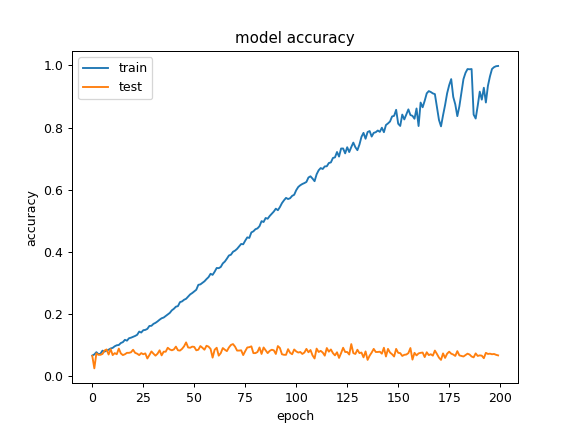

In [28]:
# summarize history for accuracy
plt.plot(history_small.history['acc'])
plt.plot(history_small.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

<IPython.core.display.Javascript object>


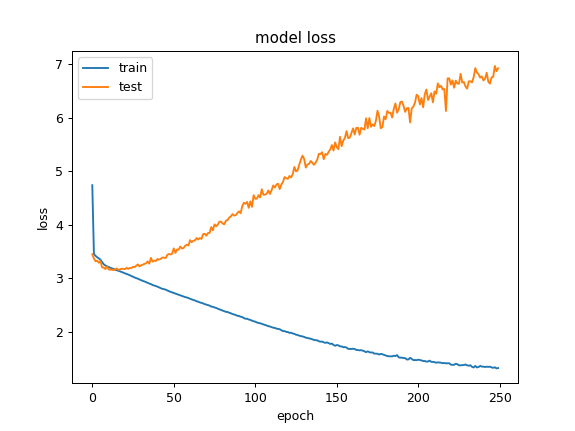

In [29]:
plt.plot(history_more_data.history['loss'])
plt.plot(history_more_data.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

These experiments allow us to conclude that the keras library is functioning as we expect it to. The next steps will require that tune the model via a parameter sweep, either through grid search or an algorithm that we write. Solutions to high variance include a bigger network and more data (assuming we are correctly regularizing). Training on more data will lower variance without hurting bias. In our particular case, we will focus our efforts on increasing the training set size, tuning regularization, and working with our neural net architecture to help our model generlize to unseen data.